

| EDA dataframe      | Description |due|
| ----------- | ----------- |----------- |
| grape_df  | 캠벨얼리 가격/거래량 + 소비자 물가 지수 + 자동차용경유 + 날씨(4개-평균기온, 평균온량, 일강수량, 일교차) + 수출입(4개) + 재배면적 + 샤인머스켓 거래량 + 실업률_경제활동인구(2개-경제활동인구, 실업률) + 최저시급    |20190101 ~ 20201104|
| shinemuscat_df   |샤인마스캇  가격/거래량 + 소비자 물가 지수 + 자동차용경유 + 날씨(4개-평균기온, 평균온량, 일강수량, 일교차) + 수출입(4개) + 재배면적 + 블루베리 거래량 + 실업률_경제활동인구(2개-경제활동인구, 실업률) + 최저시급        |20190101 ~ 20201104|
| df      | grape_train + shinemuscat_train       | 20190101 ~ 2020928|


**train accuracy / test accuracy 의 차이 비교 overfitting = 20% 이상 (10~20%)**

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'

from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib as mpl
from IPython.core.display import display, HTML
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose, STL
import urllib.request
import requests
import json
import datetime
import os
from datetime import datetime
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

/var/folders/08/yfq1rzmx605_pllcn65f77540000gn/T/ipykernel_2442/2031877544.py:10: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
# iMAC
# raw_path = '/Users/cge/Documents/yeardream/project/kurly/products_price_predict/data/raw/'
# processed_path = '/Users/cge/Documents/yeardream/project/kurly/products_price_predict/data/processed/'

In [2]:
# Macbook
raw_path = '/Users/goeun/Documents/YearDream/ProJect/kurly_project/products_price_predict/data/raw/'
processed_path = '/Users/goeun/Documents/YearDream/ProJect/kurly_project/products_price_predict/data/processed/'

In [4]:
grape = pd.read_csv(processed_path+'캠벨얼리_전처리후.csv')
mushroom = pd.read_csv(processed_path+'팽이버섯_전처리후.csv')

train = pd.read_csv(raw_path+'train.csv')
test = pd.read_csv(raw_path+'test.csv')
private = pd.read_csv(raw_path+'private_data.csv')
submission = pd.read_csv(raw_path+'sample_submission.csv')

print(grape.shape)
print(mushroom.shape)
print(private.shape)
print(submission.shape)

(1770, 9)
(1770, 9)
(291, 44)
(228, 22)


In [5]:
grape_external = pd.read_csv(processed_path+'grape_실업률추가.csv')
grape_external.columns

Index(['date', '요일', '캠벨얼리_거래량(kg)', '캠벨얼리_가격(원/kg)', '소비자물가지수', '자동차용경유',
       '재배지역_평균기온', '재배지역_평균운량', '재배지역_일강수량', '재배지역_일교차', '샤인마스캇_거래량(kg)',
       '수출(중량)', '수출(금액)', '수입(중량)', '수입(금액)', '재배면적(ha)', '최저시급', '경제활동인구',
       '실업률 (%)'],
      dtype='object')

## RobustScaler

In [6]:
## 캠벨얼리
from sklearn.preprocessing import RobustScaler

grape2 = grape.copy()
grape2.drop(columns=['date','요일','캠벨얼리_가격(원/kg)'], inplace=True)

robust_scaler = RobustScaler()
robust_scaler = robust_scaler.fit_transform(grape2)
grape_scaler = pd.DataFrame(robust_scaler, columns=grape2.columns)

grape_scaler2 = pd.concat([grape[['date','캠벨얼리_가격(원/kg)']],grape_scaler],axis = 1)
grape_scaler2.head()

date  캠벨얼리_가격(원/kg)  캠벨얼리_거래량(kg)  캠벨얼리_거래량의_1주전_평균  캠벨얼리_가격의_1주전_평균  \
0  2016-01-01            0.0     -0.060780          -0.04171        -2.010426   
1  2016-01-02         2014.0     -0.049390          -0.04171        -2.010426   
2  2016-01-03            0.0     -0.060780          -0.04171        -2.010426   
3  2016-01-04         3885.0     -0.025786          -0.04171        -2.010426   
4  2016-01-05         2853.0      0.053245          -0.04171        -2.010426   

   캠벨얼리_거래량의_2주전_평균  캠벨얼리_가격의_2주전_평균   계절  
0         -0.045141        -2.049783 -2.0  
1         -0.045141        -2.049783 -2.0  
2         -0.045141        -2.049783 -2.0  
3         -0.045141        -2.049783 -2.0  
4         -0.045141        -2.049783 -2.0

In [7]:
## 팽이버섯
from sklearn.preprocessing import RobustScaler

mushroom2 = mushroom.copy()
mushroom2.drop(columns=['date','요일','팽이버섯_가격(원/kg)'], inplace=True)

robust_scaler = RobustScaler()
robust_scaler = robust_scaler.fit_transform(mushroom2)
mushroom_scaler = pd.DataFrame(robust_scaler, columns=mushroom2.columns)

mushroom_scaler2 = pd.concat([mushroom[['date','팽이버섯_가격(원/kg)']],mushroom_scaler],axis = 1)
mushroom_scaler2.head()

date  팽이버섯_가격(원/kg)  팽이버섯_거래량(kg)  팽이버섯_거래량의_1주전_평균  팽이버섯_가격의_1주전_평균  \
0  2016-01-01            0.0     -5.738324         -8.553531        -2.089175   
1  2016-01-02         1474.0     -5.046114         -8.553531        -2.089175   
2  2016-01-03            0.0     -5.738324         -8.553531        -2.089175   
3  2016-01-04         1750.0      1.820448         -8.553531        -2.089175   
4  2016-01-05         1822.0      1.502772         -8.553531        -2.089175   

   팽이버섯_거래량의_2주전_평균  팽이버섯_가격의_2주전_평균   계절  
0          -8.71102        -2.182351 -2.0  
1          -8.71102        -2.182351 -2.0  
2          -8.71102        -2.182351 -2.0  
3          -8.71102        -2.182351 -2.0  
4          -8.71102        -2.182351 -2.0

In [8]:
grape_scaler2['date'] = pd.to_datetime(grape_scaler2['date'])
grape_scaler2.set_index('date',drop=True,inplace=True)

mushroom_scaler2['date'] = pd.to_datetime(mushroom_scaler2['date'])
mushroom_scaler2.set_index('date',drop=True,inplace=True)

In [22]:
## 스케일링 x
grape['date'] = pd.to_datetime(grape['date'])
grape.set_index('date',drop=True,inplace=True)

mushroom['date'] = pd.to_datetime(mushroom['date'])
mushroom.set_index('date',drop=True,inplace=True)

# LGBM(LightGBM)

## 캠벨얼리
성능을 알아보기 위한 모델 <br> 캠벨얼리 가격을 예측
[lightgbm](https://tpwkcorqhd.tistory.com/32)

In [9]:
grape_scaler2.columns

Index(['캠벨얼리_가격(원/kg)', '캠벨얼리_거래량(kg)', '캠벨얼리_거래량의_1주전_평균', '캠벨얼리_가격의_1주전_평균',
       '캠벨얼리_거래량의_2주전_평균', '캠벨얼리_가격의_2주전_평균', '계절'],
      dtype='object')

In [10]:
# train 20190101 ~ 20200831 / valid   20200901 ~ 20200928 / test 20200929 ~ 20201104

train_split = '2020-08-31'
train_split_1 = '2020-09-01'
valid_split = '2020-09-28'
valid_split_1 = '2020-09-29'
 
feature = grape_scaler2[['캠벨얼리_거래량(kg)','캠벨얼리_거래량의_1주전_평균', '캠벨얼리_가격의_1주전_평균',
                 '캠벨얼리_거래량의_2주전_평균', '캠벨얼리_가격의_2주전_평균', '계절']]
target = grape_scaler2['캠벨얼리_가격(원/kg)']

X_train = feature[:train_split]
y_train = target[:train_split]

X_valid = feature[train_split_1:valid_split]
y_valid = target[train_split_1:valid_split]

X_test = feature[valid_split_1:]
y_test = target[valid_split_1:]

print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape,X_test.shape, y_test.shape)

(1705, 6) (1705,) (28, 6) (28,) (37, 6) (37,)


 LightGBM
```
params = {'learning_rate': 0.01, 
          'max_depth': 6, 
          'boosting': 'gbdt', 
          'objective': 'regression', 
          'metric': 'mse', 
          'is_training_metric': True, 
          'num_leaves': 100, 
          'feature_fraction': 0.8, 
          'bagging_fraction': 0.8, 
          'bagging_freq': 5, 
          'seed':42,
          'num_threads':8
             }
```

In [11]:
import lightgbm as lgb

def init_score(y):
    return y - np.mean(y)

In [12]:
train_ds = lgb.Dataset(X_train,  label = y_train)
val_ds = lgb.Dataset(X_valid,  label = y_valid)

In [18]:
params = {
    'objective': 'regression',
    'metric':'mae',
    'seed':42
}

model = lgb.train(params, 
                   train_ds,
                   1000,
                   val_ds,
                   verbose_eval = 100, 
                   early_stopping_rounds = 100)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000518 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1226
[LightGBM] [Info] Number of data points in the train set: 1705, number of used features: 6
[LightGBM] [Info] Start training from score 3191.856997
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 309.867
[200]	valid_0's l1: 307.59
Early stopping, best iteration is:
[175]	valid_0's l1: 304.946


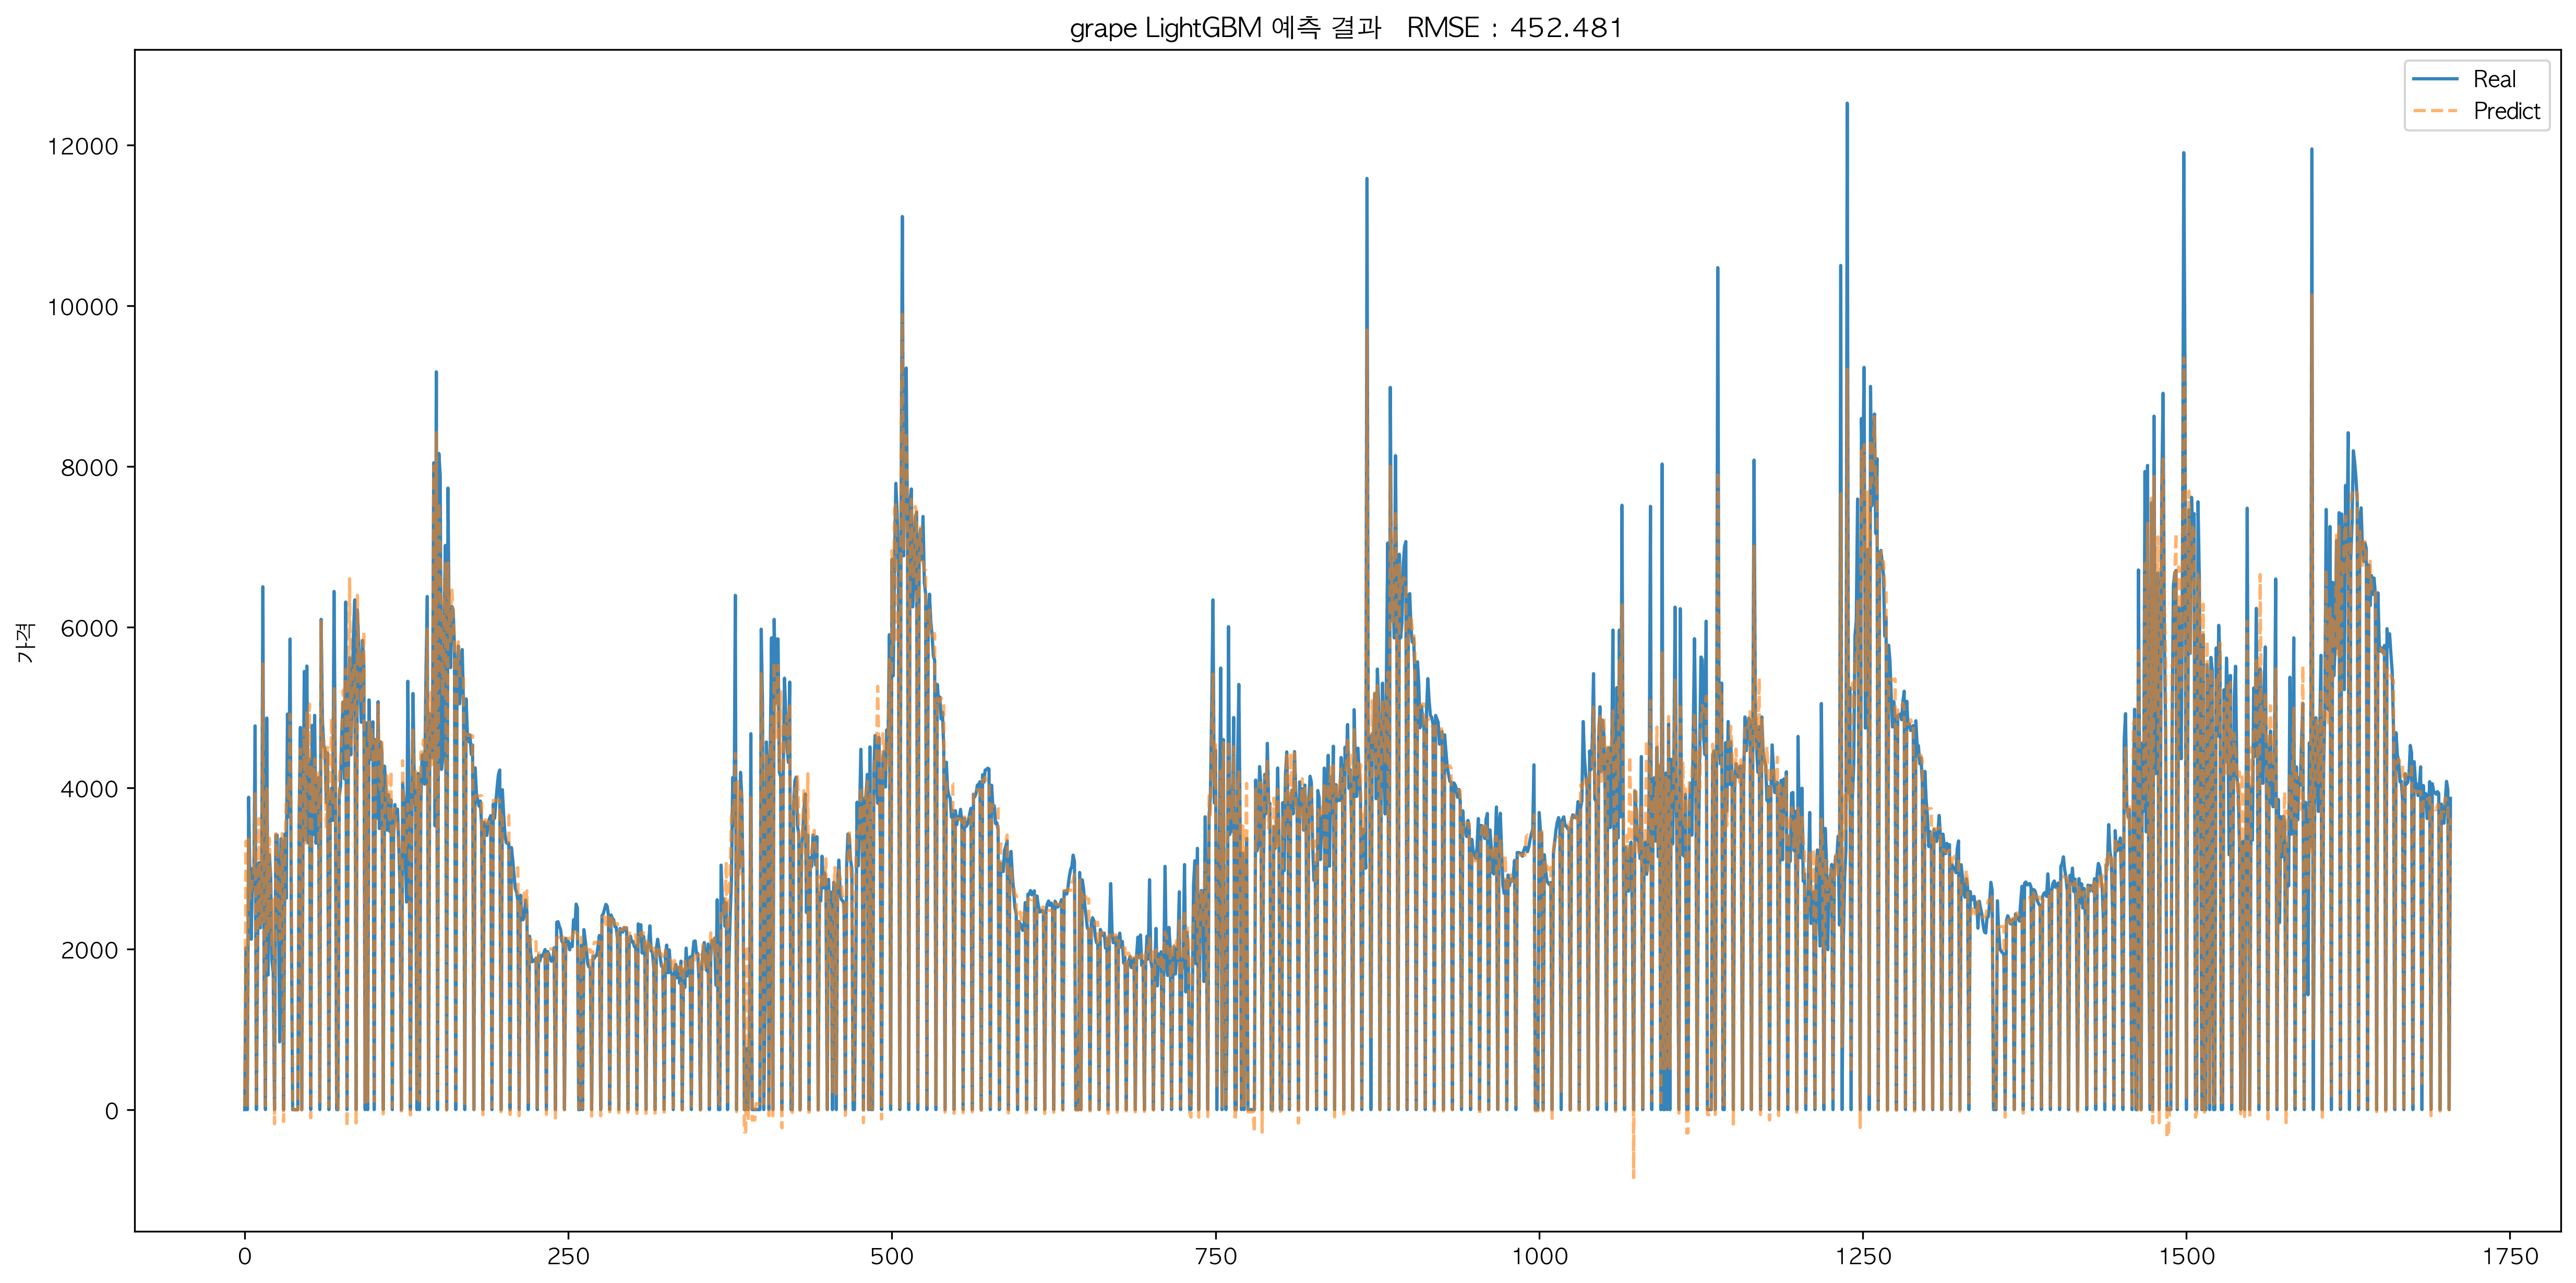

In [19]:
# metrics
y_pred = model.predict(X_test)
RMSE = (mean_squared_error(y_test, y_pred) ** 0.5)
# np.sqrt(mean_squared_error(y_test, y_pred))

plt.figure(figsize=(20, 10), dpi=300)
plt.title('grape LightGBM 예측 결과'+   '   RMSE : ' + str(RMSE)[:7])
plt.ylabel('가격')
plt.plot(np.array(y_train), alpha = 0.9, label = 'Real')
plt.plot(model.predict(X_train), alpha = 0.6, linestyle = "--", label = 'Predict')
plt.legend()
plt.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

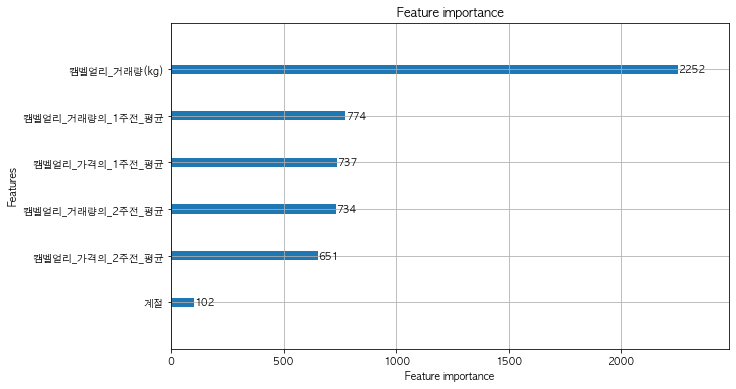

In [20]:
# importance
from lightgbm import plot_importance

fig, ax = plt.subplots(figsize = (10,6))
plot_importance(model, ax = ax)

In [52]:
## 모델 예측

x_test = np.array([[370000, 270000, 10000, 3500000, 5000, 2]])

label = y_pred[0]
y_predict = model.predict(x_test)
confidence = y_predict[0]

print(f'label : {label} \nconfidence : {confidence}\nratio : {round(label/confidence, 2)}' )

label : 2711.032337598205 
confidence : 6610.477746561075
ratio : 0.41


### 모델의 예측 결과
전반적인 추세는 잘 예측하지만 거래가 발생하지 않는 일요일 전후로 예측 성능이 떨어지는 모습을 보임

큰 폭으로 변동되는 가격은 잘 예측 하지 못함(뾰족뾰족한 부분)

[모델링참고](https://github.com/seongmoonKang/Data-Analysis-Capstone)

## 2. 팽이버섯

In [23]:
mushroom.columns

Index(['요일', '팽이버섯_거래량(kg)', '팽이버섯_가격(원/kg)', '팽이버섯_거래량의_1주전_평균',
       '팽이버섯_가격의_1주전_평균', '팽이버섯_거래량의_2주전_평균', '팽이버섯_가격의_2주전_평균', '계절'],
      dtype='object')

In [24]:
# train 20190101 ~ 20200831 / valid   20200901 ~ 20200928 / test 20200929 ~ 20201104

train_split = '2020-08-31'
train_split_1 = '2020-09-01'
valid_split = '2020-09-28'
valid_split_1 = '2020-09-29'

feature = mushroom[['팽이버섯_거래량(kg)', '팽이버섯_거래량의_1주전_평균', '팽이버섯_가격의_1주전_평균',
                       '팽이버섯_거래량의_2주전_평균', '팽이버섯_가격의_2주전_평균', '계절']]
target = mushroom['팽이버섯_가격(원/kg)']

X_train = feature[:train_split]
y_train = target[:train_split]

X_valid = feature[train_split_1:valid_split]
y_valid = target[train_split_1:valid_split]

X_test = feature[valid_split_1:]
y_test = target[valid_split_1:]

print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape,X_test.shape, y_test.shape)

(1705, 6) (1705,) (28, 6) (28,) (37, 6) (37,)


In [25]:
train_ds = lgb.Dataset(X_train,  label = y_train)
val_ds = lgb.Dataset(X_valid,  label = y_valid)

In [26]:
params = {
    'objective': 'regression',
    'metric':'mae',
    'seed':42
}

model = lgb.train(params, 
                   train_ds,
                   1000,
                   val_ds,
                   verbose_eval = 100, 
                   early_stopping_rounds = 100)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001069 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1226
[LightGBM] [Info] Number of data points in the train set: 1705, number of used features: 6
[LightGBM] [Info] Start training from score 1418.580645
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 177.653
[200]	valid_0's l1: 182.661
Early stopping, best iteration is:
[145]	valid_0's l1: 176.253


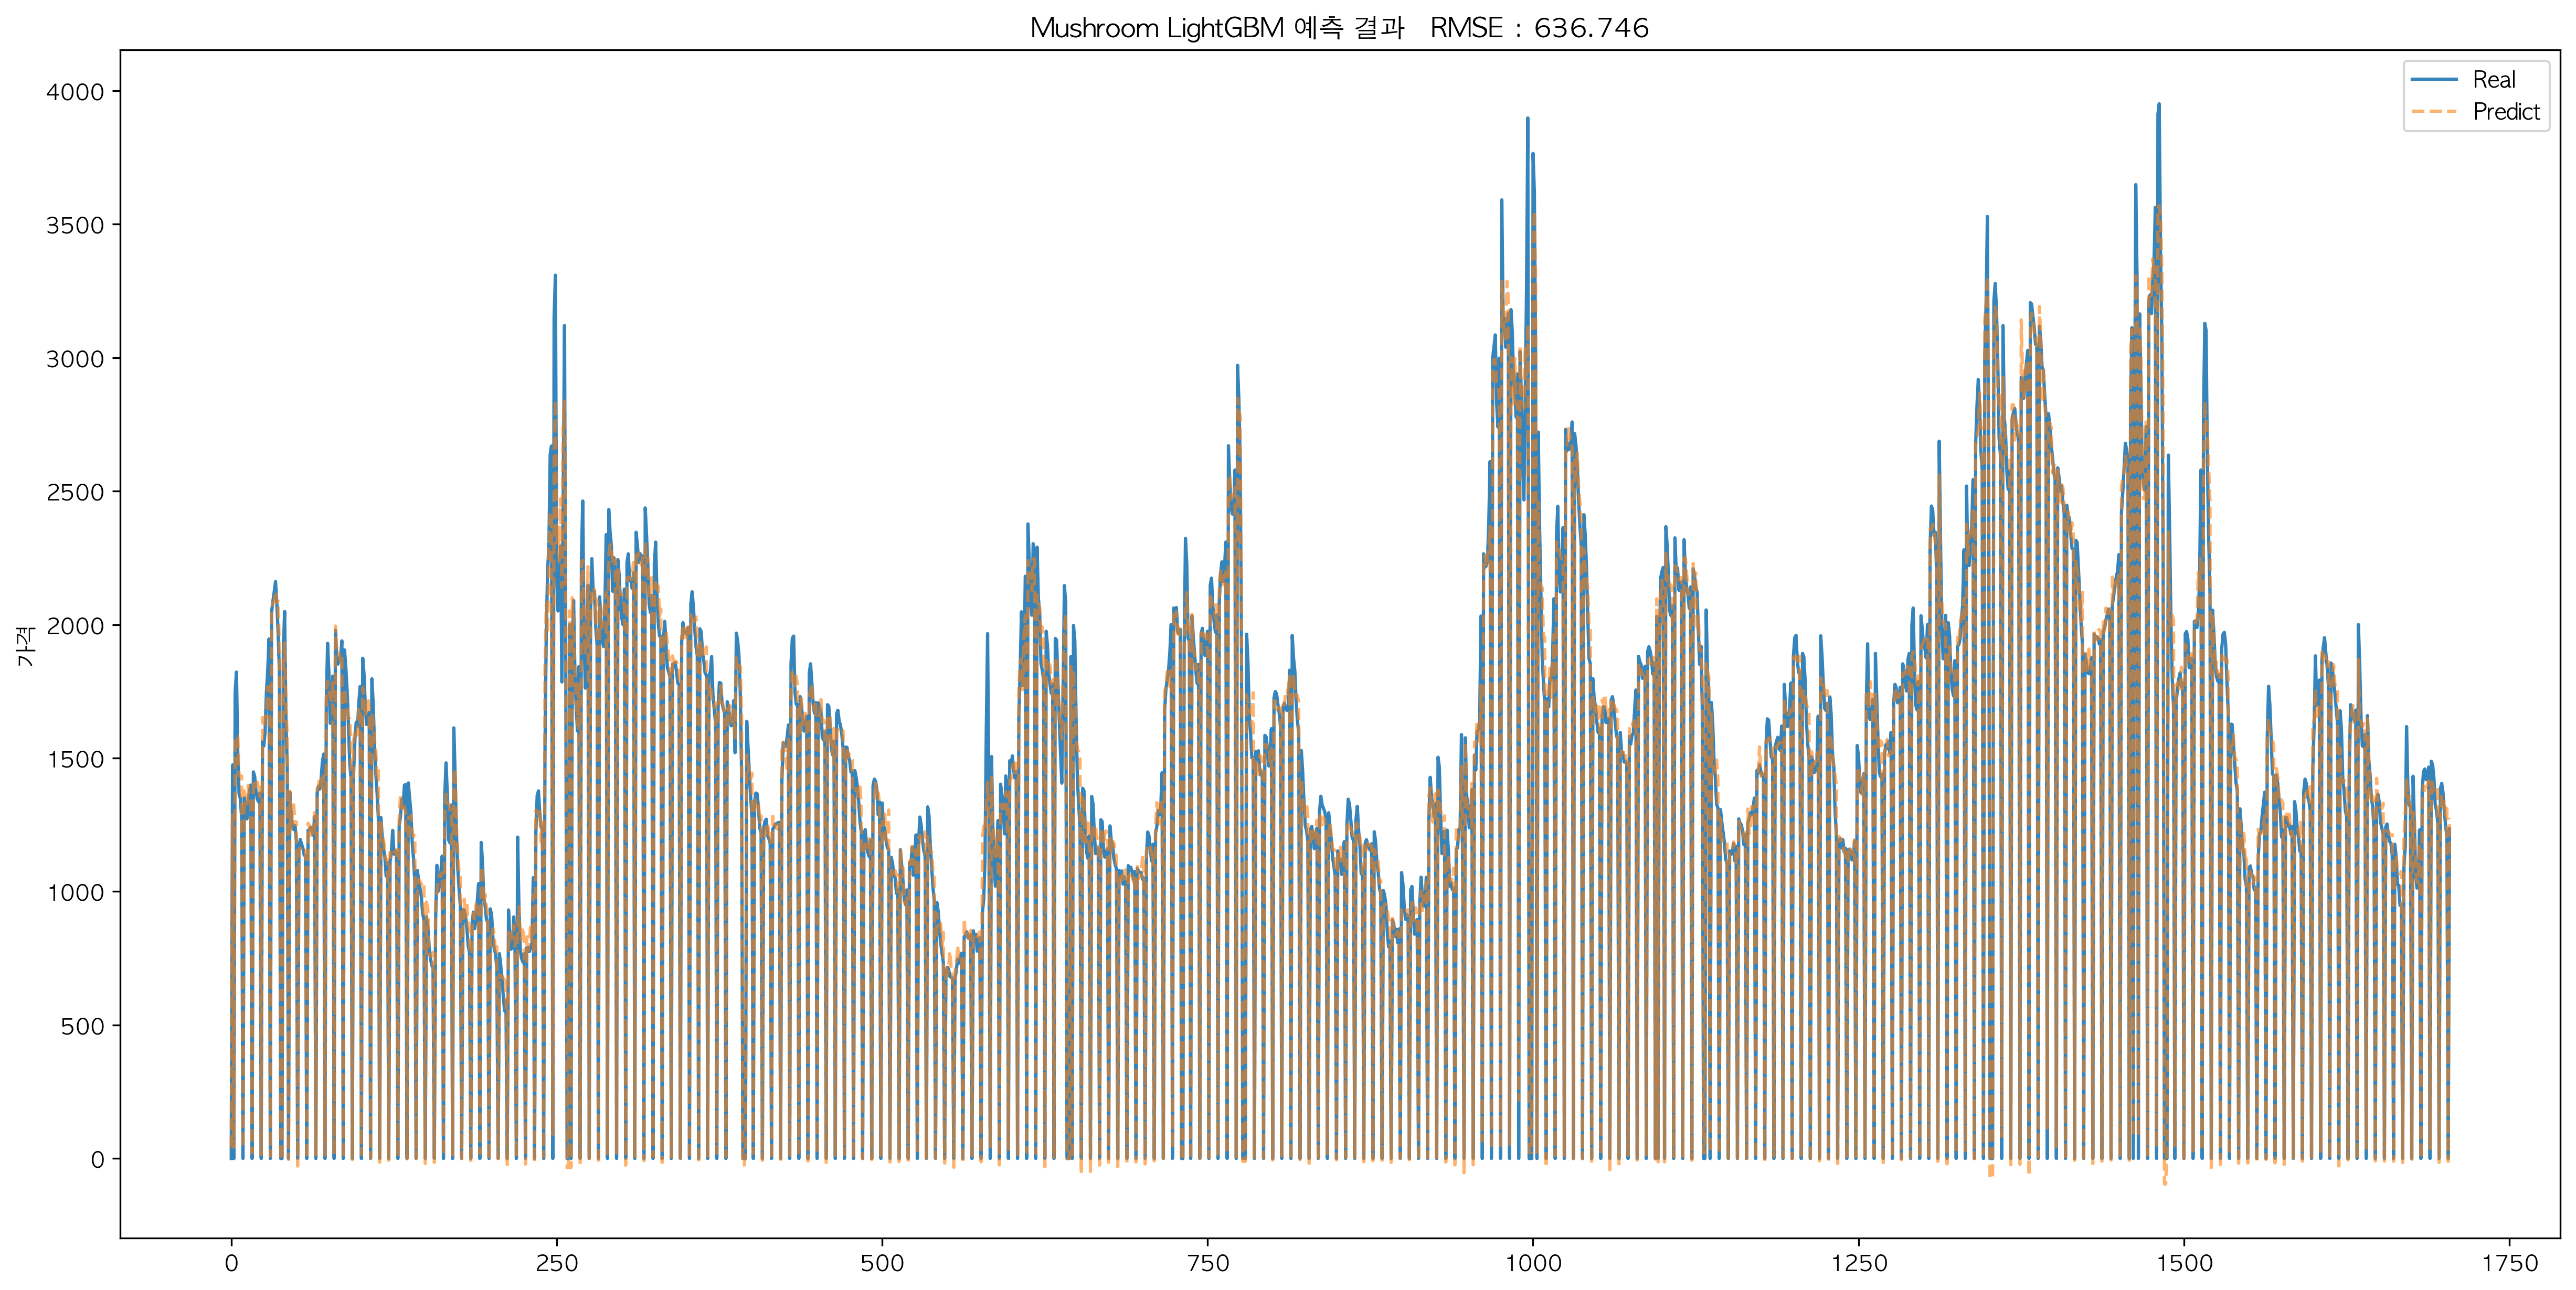

636.75

In [27]:
# metrics
y_pred = model.predict(X_test)
RMSE = (mean_squared_error(y_test, y_pred) ** 0.5)
# np.sqrt(mean_squared_error(y_test, y_pred))

plt.figure(figsize=(20, 10), dpi=300)
plt.title('Mushroom LightGBM 예측 결과'+   '   RMSE : ' + str(RMSE)[:7])
plt.ylabel('가격')
plt.plot(np.array(y_train), alpha = 0.9, label = 'Real')
plt.plot(model.predict(X_train), alpha = 0.6, linestyle = "--", label = 'Predict')
plt.legend()
plt.show()
round(RMSE, 2)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

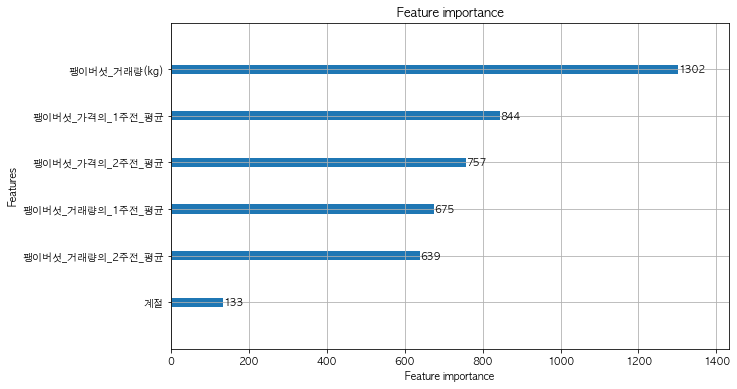

In [28]:
# importance
from lightgbm import plot_importance

fig, ax = plt.subplots(figsize = (10,6))
plot_importance(model, ax = ax)

In [59]:
## 모델 예측

x_test = np.array([[7000, 27000, 10000, 35000, 25000, 3]])

label = y_pred[0]
y_predict = model.predict(x_test)
confidence = y_predict[0]

print(f'label : {label} \nconfidence : {confidence}\nratio : {round(label/confidence, 2)}' )

label : 17835.133233827215 
confidence : 29507.118108952585
ratio : 0.6


# LSTM
## 캠벨얼리


In [11]:
import tensorflow as tf
import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, LSTM, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from statsmodels.tsa.seasonal import seasonal_decompose, STL

# train_split = '2020-08-31'
# train_split_1 = '2020-09-01'
valid_split = '2020-09-28'
valid_split_1 = '2020-09-29'

feature = ['캠벨얼리_거래량(kg)','캠벨얼리_거래량의_1주전_평균', '캠벨얼리_가격의_1주전_평균',
           '캠벨얼리_거래량의_2주전_평균', '캠벨얼리_가격의_2주전_평균', '계절']
target = grape_scaler2[['캠벨얼리_가격(원/kg)']]

X_train = grape_scaler2[feature][:valid_split].values.reshape(-1,1,len(feature))
y_train = target[:valid_split].values.reshape(-1,1,1)

# X_valid = grape_scaler2[feature][train_split_1:valid_split].values.reshape(-1,1,len(feature))
# y_valid = target[train_split_1:valid_split].values.reshape(-1,1,1)

X_test = grape_scaler2[feature][valid_split_1:].values.reshape(-1,1,len(feature))
y_test = target[valid_split_1:].values.reshape(-1,1,1)

print(X_train.shape, y_train.shape,X_test.shape, y_test.shape)

(1705, 1, 6) (1705, 1, 1) (28, 1, 6) (28, 1, 1) (37, 1, 6) (37, 1, 1)


In [12]:
model = Sequential()
model.add(layers.Activation('relu'))
model.add(tf.compat.v1.keras.layers.LSTM(100, input_shape=(21,len(feature)), return_sequences=True))
model.add(Dropout(0.1))
model.add(layers.Dense(30))
model.add(Dropout(0.1))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(patience=30)
model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split = 0.1, callbacks=[early_stopping], verbose=1)

Epoch 1/1000


2022-10-18 11:29:42.892460: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


48/48 [==============================] - 1s 4ms/step - loss: 13544994.0000 - val_loss: 22928104.0000
Epoch 2/1000
48/48 [==============================] - 0s 1ms/step - loss: 13487734.0000 - val_loss: 22775976.0000
Epoch 3/1000
48/48 [==============================] - 0s 2ms/step - loss: 13298130.0000 - val_loss: 22354486.0000
Epoch 4/1000
48/48 [==============================] - 0s 2ms/step - loss: 12924993.0000 - val_loss: 21586322.0000
Epoch 5/1000
48/48 [==============================] - 0s 1ms/step - loss: 12354349.0000 - val_loss: 20460988.0000
Epoch 6/1000
48/48 [==============================] - 0s 2ms/step - loss: 11601156.0000 - val_loss: 19000670.0000
Epoch 7/1000
48/48 [==============================] - 0s 2ms/step - loss: 10703540.0000 - val_loss: 17377652.0000
Epoch 8/1000
48/48 [==============================] - 0s 1ms/step - loss: 9708353.0000 - val_loss: 15771947.0000
Epoch 9/1000
48/48 [==============================] - 0s 1ms/step - loss: 8712116.0000 - val_loss: 141

48/48 [==============================] - 0s 1ms/step - loss: 2860102.5000 - val_loss: 3921470.5000
Epoch 146/1000
48/48 [==============================] - 0s 1ms/step - loss: 2831489.5000 - val_loss: 3922729.2500
Epoch 147/1000
48/48 [==============================] - 0s 1ms/step - loss: 2869737.2500 - val_loss: 3915066.7500
Epoch 148/1000
48/48 [==============================] - 0s 1ms/step - loss: 2837641.5000 - val_loss: 3925884.7500
Epoch 149/1000
48/48 [==============================] - 0s 1ms/step - loss: 2810670.5000 - val_loss: 3900507.0000
Epoch 150/1000
48/48 [==============================] - 0s 1ms/step - loss: 2862786.0000 - val_loss: 3909010.0000
Epoch 151/1000
48/48 [==============================] - 0s 2ms/step - loss: 2783085.2500 - val_loss: 3896496.0000
Epoch 152/1000
48/48 [==============================] - 0s 2ms/step - loss: 2841822.2500 - val_loss: 3886259.7500
Epoch 153/1000
48/48 [==============================] - 0s 1ms/step - loss: 2833627.5000 - val_loss: 38

Epoch 217/1000
48/48 [==============================] - 0s 1ms/step - loss: 2773687.5000 - val_loss: 3667721.2500
Epoch 218/1000
48/48 [==============================] - 0s 1ms/step - loss: 2787907.0000 - val_loss: 3665918.2500
Epoch 219/1000
48/48 [==============================] - 0s 1ms/step - loss: 2736620.2500 - val_loss: 3638600.2500
Epoch 220/1000
48/48 [==============================] - 0s 1ms/step - loss: 2778446.5000 - val_loss: 3635521.7500
Epoch 221/1000
48/48 [==============================] - 0s 1ms/step - loss: 2770926.2500 - val_loss: 3652224.7500
Epoch 222/1000
48/48 [==============================] - 0s 1ms/step - loss: 2790478.0000 - val_loss: 3669939.2500
Epoch 223/1000
48/48 [==============================] - 0s 1ms/step - loss: 2761121.5000 - val_loss: 3644725.5000
Epoch 224/1000
48/48 [==============================] - 0s 1ms/step - loss: 2783181.0000 - val_loss: 3639263.0000
Epoch 225/1000
48/48 [==============================] - 0s 1ms/step - loss: 2759217.5000

Epoch 289/1000
48/48 [==============================] - 0s 1ms/step - loss: 2692004.0000 - val_loss: 3521670.7500
Epoch 290/1000
48/48 [==============================] - 0s 1ms/step - loss: 2782214.2500 - val_loss: 3531281.5000
Epoch 291/1000
48/48 [==============================] - 0s 1ms/step - loss: 2743920.2500 - val_loss: 3522698.7500
Epoch 292/1000
48/48 [==============================] - 0s 1ms/step - loss: 2729571.5000 - val_loss: 3528500.0000
Epoch 293/1000
48/48 [==============================] - 0s 1ms/step - loss: 2740772.0000 - val_loss: 3513226.5000
Epoch 294/1000
48/48 [==============================] - 0s 1ms/step - loss: 2721280.0000 - val_loss: 3516593.5000
Epoch 295/1000
48/48 [==============================] - 0s 1ms/step - loss: 2717084.7500 - val_loss: 3517018.5000
Epoch 296/1000
48/48 [==============================] - 0s 1ms/step - loss: 2761925.0000 - val_loss: 3525789.2500
Epoch 297/1000
48/48 [==============================] - 0s 1ms/step - loss: 2724340.7500

Epoch 361/1000
48/48 [==============================] - 0s 1ms/step - loss: 2690136.2500 - val_loss: 3438101.7500
Epoch 362/1000
48/48 [==============================] - 0s 1ms/step - loss: 2730479.2500 - val_loss: 3449417.0000
Epoch 363/1000
48/48 [==============================] - 0s 1ms/step - loss: 2704225.7500 - val_loss: 3433457.0000
Epoch 364/1000
48/48 [==============================] - 0s 1ms/step - loss: 2687271.2500 - val_loss: 3421214.7500
Epoch 365/1000
48/48 [==============================] - 0s 1ms/step - loss: 2703665.5000 - val_loss: 3440019.0000
Epoch 366/1000
48/48 [==============================] - 0s 1ms/step - loss: 2700709.0000 - val_loss: 3438868.5000
Epoch 367/1000
48/48 [==============================] - 0s 1ms/step - loss: 2727841.5000 - val_loss: 3423569.2500
Epoch 368/1000
48/48 [==============================] - 0s 1ms/step - loss: 2741605.0000 - val_loss: 3437747.0000
Epoch 369/1000
48/48 [==============================] - 0s 1ms/step - loss: 2715528.0000

Epoch 433/1000
48/48 [==============================] - 0s 1ms/step - loss: 2683367.0000 - val_loss: 3372221.0000
Epoch 434/1000
48/48 [==============================] - 0s 1ms/step - loss: 2700912.7500 - val_loss: 3375783.7500
Epoch 435/1000
48/48 [==============================] - 0s 2ms/step - loss: 2698902.2500 - val_loss: 3379018.7500
Epoch 436/1000
48/48 [==============================] - 0s 2ms/step - loss: 2694890.2500 - val_loss: 3358019.2500
Epoch 437/1000
48/48 [==============================] - 0s 1ms/step - loss: 2663939.2500 - val_loss: 3375669.5000
Epoch 438/1000
48/48 [==============================] - 0s 1ms/step - loss: 2702207.0000 - val_loss: 3362113.0000
Epoch 439/1000
48/48 [==============================] - 0s 2ms/step - loss: 2664690.7500 - val_loss: 3361234.7500
Epoch 440/1000
48/48 [==============================] - 0s 1ms/step - loss: 2664828.2500 - val_loss: 3352774.0000
Epoch 441/1000
48/48 [==============================] - 0s 1ms/step - loss: 2689550.2500

Epoch 505/1000
48/48 [==============================] - 0s 1ms/step - loss: 2669565.0000 - val_loss: 3315147.2500
Epoch 506/1000
48/48 [==============================] - 0s 1ms/step - loss: 2669703.0000 - val_loss: 3313927.0000
Epoch 507/1000
48/48 [==============================] - 0s 1ms/step - loss: 2634886.2500 - val_loss: 3307485.5000
Epoch 508/1000
48/48 [==============================] - 0s 1ms/step - loss: 2673941.0000 - val_loss: 3317220.7500
Epoch 509/1000
48/48 [==============================] - 0s 2ms/step - loss: 2662128.5000 - val_loss: 3301607.7500
Epoch 510/1000
48/48 [==============================] - 0s 1ms/step - loss: 2663322.7500 - val_loss: 3308971.5000
Epoch 511/1000
48/48 [==============================] - 0s 2ms/step - loss: 2629313.0000 - val_loss: 3324383.5000
Epoch 512/1000
48/48 [==============================] - 0s 1ms/step - loss: 2655118.7500 - val_loss: 3311442.7500
Epoch 513/1000
48/48 [==============================] - 0s 1ms/step - loss: 2675576.2500

Epoch 577/1000
48/48 [==============================] - 0s 1ms/step - loss: 2659757.0000 - val_loss: 3262887.0000
Epoch 578/1000
48/48 [==============================] - 0s 1ms/step - loss: 2632211.7500 - val_loss: 3256007.0000
Epoch 579/1000
48/48 [==============================] - 0s 1ms/step - loss: 2666826.5000 - val_loss: 3250344.0000
Epoch 580/1000
48/48 [==============================] - 0s 1ms/step - loss: 2640815.0000 - val_loss: 3258340.7500
Epoch 581/1000
48/48 [==============================] - 0s 1ms/step - loss: 2612165.0000 - val_loss: 3251965.0000
Epoch 582/1000
48/48 [==============================] - 0s 1ms/step - loss: 2686765.5000 - val_loss: 3254544.5000
Epoch 583/1000
48/48 [==============================] - 0s 1ms/step - loss: 2648558.7500 - val_loss: 3256006.0000
Epoch 584/1000
48/48 [==============================] - 0s 1ms/step - loss: 2660333.2500 - val_loss: 3247596.5000
Epoch 585/1000
48/48 [==============================] - 0s 1ms/step - loss: 2627990.7500

Epoch 649/1000
48/48 [==============================] - 0s 1ms/step - loss: 2620982.2500 - val_loss: 3216712.5000
Epoch 650/1000
48/48 [==============================] - 0s 1ms/step - loss: 2612617.0000 - val_loss: 3214979.2500
Epoch 651/1000
48/48 [==============================] - 0s 1ms/step - loss: 2644832.0000 - val_loss: 3204659.7500
Epoch 652/1000
48/48 [==============================] - 0s 1ms/step - loss: 2595369.0000 - val_loss: 3205940.0000
Epoch 653/1000
48/48 [==============================] - 0s 1ms/step - loss: 2650850.5000 - val_loss: 3202853.5000
Epoch 654/1000
48/48 [==============================] - 0s 1ms/step - loss: 2605956.2500 - val_loss: 3207421.5000
Epoch 655/1000
48/48 [==============================] - 0s 1ms/step - loss: 2628884.2500 - val_loss: 3202544.7500
Epoch 656/1000
48/48 [==============================] - 0s 1ms/step - loss: 2712895.5000 - val_loss: 3213584.7500
Epoch 657/1000
48/48 [==============================] - 0s 1ms/step - loss: 2612350.0000

Epoch 721/1000
48/48 [==============================] - 0s 1ms/step - loss: 2625147.2500 - val_loss: 3181614.0000
Epoch 722/1000
48/48 [==============================] - 0s 1ms/step - loss: 2605392.5000 - val_loss: 3178847.5000
Epoch 723/1000
48/48 [==============================] - 0s 1ms/step - loss: 2590744.2500 - val_loss: 3184060.2500
Epoch 724/1000
48/48 [==============================] - 0s 1ms/step - loss: 2608722.0000 - val_loss: 3184831.0000
Epoch 725/1000
48/48 [==============================] - 0s 1ms/step - loss: 2586388.7500 - val_loss: 3181598.7500
Epoch 726/1000
48/48 [==============================] - 0s 1ms/step - loss: 2628069.7500 - val_loss: 3185520.2500
Epoch 727/1000
48/48 [==============================] - 0s 1ms/step - loss: 2610317.5000 - val_loss: 3173724.5000
Epoch 728/1000
48/48 [==============================] - 0s 1ms/step - loss: 2614071.5000 - val_loss: 3185203.7500
Epoch 729/1000
48/48 [==============================] - 0s 1ms/step - loss: 2640881.2500

Epoch 793/1000
48/48 [==============================] - 0s 1ms/step - loss: 2598437.0000 - val_loss: 3147077.2500
Epoch 794/1000
48/48 [==============================] - 0s 1ms/step - loss: 2655249.0000 - val_loss: 3148632.0000
Epoch 795/1000
48/48 [==============================] - 0s 1ms/step - loss: 2650109.0000 - val_loss: 3151920.2500
Epoch 796/1000
48/48 [==============================] - 0s 1ms/step - loss: 2601438.7500 - val_loss: 3160537.5000
Epoch 797/1000
48/48 [==============================] - 0s 1ms/step - loss: 2660837.7500 - val_loss: 3148056.2500
Epoch 798/1000
48/48 [==============================] - 0s 1ms/step - loss: 2608127.0000 - val_loss: 3143938.5000
Epoch 799/1000
48/48 [==============================] - 0s 1ms/step - loss: 2616708.5000 - val_loss: 3154787.2500
Epoch 800/1000
48/48 [==============================] - 0s 1ms/step - loss: 2632486.0000 - val_loss: 3147845.2500
Epoch 801/1000
48/48 [==============================] - 0s 1ms/step - loss: 2625927.0000

Epoch 865/1000
48/48 [==============================] - 0s 1ms/step - loss: 2619233.5000 - val_loss: 3133806.7500
Epoch 866/1000
48/48 [==============================] - 0s 1ms/step - loss: 2595822.0000 - val_loss: 3130870.0000
Epoch 867/1000
48/48 [==============================] - 0s 1ms/step - loss: 2597376.7500 - val_loss: 3130379.5000
Epoch 868/1000
48/48 [==============================] - 0s 1ms/step - loss: 2611289.7500 - val_loss: 3124949.0000
Epoch 869/1000
48/48 [==============================] - 0s 1ms/step - loss: 2602007.7500 - val_loss: 3132601.2500
Epoch 870/1000
48/48 [==============================] - 0s 1ms/step - loss: 2609754.0000 - val_loss: 3130102.7500
Epoch 871/1000
48/48 [==============================] - 0s 1ms/step - loss: 2590787.5000 - val_loss: 3120584.7500
Epoch 872/1000
48/48 [==============================] - 0s 1ms/step - loss: 2586201.0000 - val_loss: 3123927.5000
Epoch 873/1000
48/48 [==============================] - 0s 1ms/step - loss: 2602944.5000

Epoch 937/1000
48/48 [==============================] - 0s 1ms/step - loss: 2581819.5000 - val_loss: 3099947.0000
Epoch 938/1000
48/48 [==============================] - 0s 1ms/step - loss: 2603362.0000 - val_loss: 3103208.7500
Epoch 939/1000
48/48 [==============================] - 0s 1ms/step - loss: 2612729.7500 - val_loss: 3096755.7500
Epoch 940/1000
48/48 [==============================] - 0s 1ms/step - loss: 2581328.0000 - val_loss: 3107759.5000
Epoch 941/1000
48/48 [==============================] - 0s 1ms/step - loss: 2616950.7500 - val_loss: 3108287.0000
Epoch 942/1000
48/48 [==============================] - 0s 1ms/step - loss: 2598093.0000 - val_loss: 3109091.7500
Epoch 943/1000
48/48 [==============================] - 0s 1ms/step - loss: 2588988.5000 - val_loss: 3106618.5000
Epoch 944/1000
48/48 [==============================] - 0s 1ms/step - loss: 2603832.5000 - val_loss: 3122315.0000
Epoch 945/1000
48/48 [==============================] - 0s 1ms/step - loss: 2570408.7500

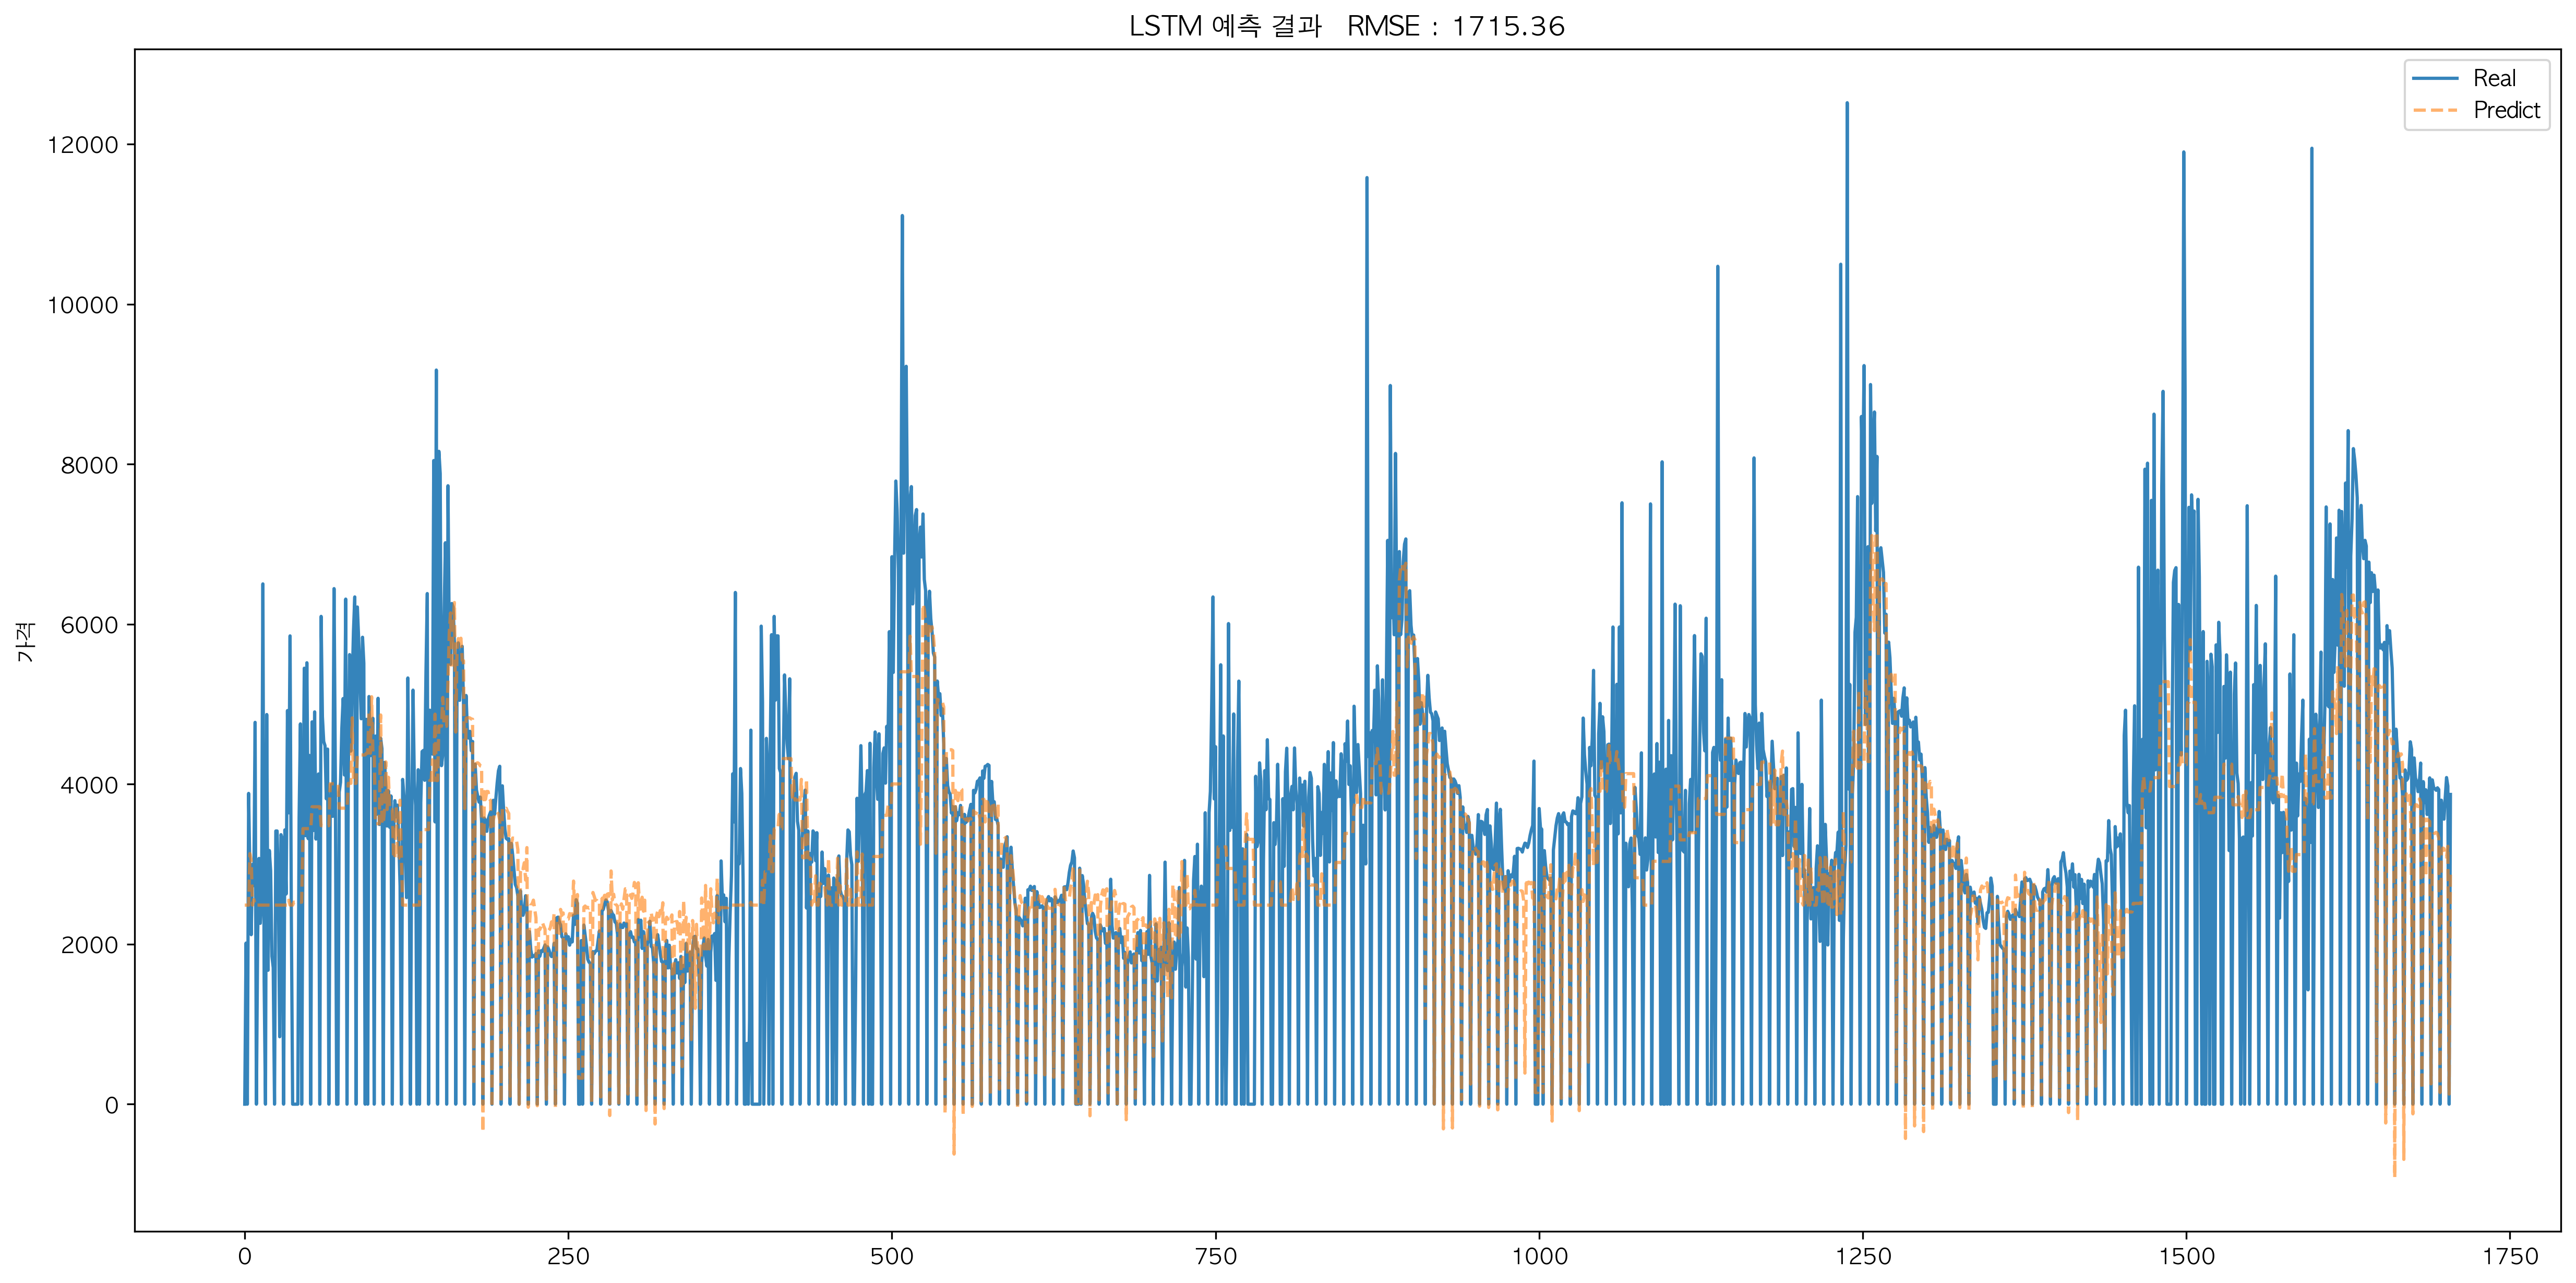

In [13]:
y_pred = model.predict(X_test)
RMSE = mean_squared_error(y_test.reshape(-1,1), y_pred.reshape(-1,1)) ** 0.5

plt.figure(figsize=(20, 10), dpi=300)
plt.title('LSTM 예측 결과'+   '   RMSE : ' + str(RMSE)[:7])
plt.ylabel('가격')
plt.plot(np.array(y_train.reshape(-1,1)), alpha = 0.9, label = 'Real')
plt.plot(model.predict(X_train).reshape(-1,1), alpha = 0.6, linestyle = "--", label = 'Predict')
plt.legend()
plt.show()


## 샤인머스켓

In [15]:
import tensorflow as tf
import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, LSTM, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from statsmodels.tsa.seasonal import seasonal_decompose, STL

# train_split = '2020-08-31'
# train_split_1 = '2020-09-01'
valid_split = '2020-09-28'
valid_split_1 = '2020-09-29'

feature = ['샤인마스캇_거래량(kg)', '샤인마스캇_거래량의_1주전_평균', '샤인마스캇_가격의_1주전_평균', 
              '샤인마스캇_거래량의_2주전_평균', '샤인마스캇_가격의_2주전_평균', '계절']
target = shinemuscat_scaler2[['샤인마스캇_가격(원/kg)']]

X_train = shinemuscat_scaler2[feature][:valid_split].values.reshape(-1,1,len(feature))
y_train = target[:valid_split].values.reshape(-1,1,1)

# X_valid = shinemuscat_scaler2[feature][train_split_1:valid_split].values.reshape(-1,1,len(feature))
# y_valid = target[train_split_1:valid_split].values.reshape(-1,1,1)

X_test = shinemuscat_scaler2[feature][valid_split_1:].values.reshape(-1,1,len(feature))
y_test = target[valid_split_1:].values.reshape(-1,1,1)

print(X_train.shape, y_train.shape,X_test.shape, y_test.shape)

(1705, 1, 6) (1705, 1, 1) (28, 1, 6) (28, 1, 1) (37, 1, 6) (37, 1, 1)


In [16]:
model = Sequential()
model.add(layers.Activation('relu'))
model.add(tf.compat.v1.keras.layers.LSTM(100, input_shape=(21,len(feature)), return_sequences=True))
model.add(Dropout(0.1))
model.add(layers.Dense(30))
model.add(Dropout(0.1))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(patience=30)
model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split = 0.1, callbacks=[early_stopping], verbose=1)

Epoch 1/1000
48/48 [==============================] - 1s 6ms/step - loss: 95580840.0000 - val_loss: 253045728.0000
Epoch 2/1000
48/48 [==============================] - 0s 1ms/step - loss: 95411720.0000 - val_loss: 252455712.0000
Epoch 3/1000
48/48 [==============================] - 0s 1ms/step - loss: 94912448.0000 - val_loss: 251039584.0000
Epoch 4/1000
48/48 [==============================] - 0s 2ms/step - loss: 93955832.0000 - val_loss: 248643040.0000
Epoch 5/1000
48/48 [==============================] - 0s 1ms/step - loss: 92505984.0000 - val_loss: 245227072.0000
Epoch 6/1000
48/48 [==============================] - 0s 1ms/step - loss: 90579096.0000 - val_loss: 240847984.0000
Epoch 7/1000
48/48 [==============================] - 0s 2ms/step - loss: 88145712.0000 - val_loss: 235691888.0000
Epoch 8/1000
48/48 [==============================] - 0s 1ms/step - loss: 85288640.0000 - val_loss: 230039200.0000
Epoch 9/1000
48/48 [==============================] - 0s 1ms/step - loss: 822604

Epoch 72/1000
48/48 [==============================] - 0s 2ms/step - loss: 23667376.0000 - val_loss: 96592712.0000
Epoch 73/1000
48/48 [==============================] - 0s 1ms/step - loss: 23344098.0000 - val_loss: 96454384.0000
Epoch 74/1000
48/48 [==============================] - 0s 2ms/step - loss: 23704208.0000 - val_loss: 96146088.0000
Epoch 75/1000
48/48 [==============================] - 0s 2ms/step - loss: 23321946.0000 - val_loss: 96002120.0000
Epoch 76/1000
48/48 [==============================] - 0s 2ms/step - loss: 23320878.0000 - val_loss: 95864728.0000
Epoch 77/1000
48/48 [==============================] - 0s 2ms/step - loss: 23485112.0000 - val_loss: 95713488.0000
Epoch 78/1000
48/48 [==============================] - 0s 2ms/step - loss: 23241236.0000 - val_loss: 95267512.0000
Epoch 79/1000
48/48 [==============================] - 0s 2ms/step - loss: 23009990.0000 - val_loss: 95110488.0000
Epoch 80/1000
48/48 [==============================] - 0s 2ms/step - loss: 23562

Epoch 143/1000
48/48 [==============================] - 0s 1ms/step - loss: 16230938.0000 - val_loss: 67584808.0000
Epoch 144/1000
48/48 [==============================] - 0s 2ms/step - loss: 16343716.0000 - val_loss: 67306216.0000
Epoch 145/1000
48/48 [==============================] - 0s 1ms/step - loss: 16612369.0000 - val_loss: 66673384.0000
Epoch 146/1000
48/48 [==============================] - 0s 1ms/step - loss: 15752698.0000 - val_loss: 66284372.0000
Epoch 147/1000
48/48 [==============================] - 0s 1ms/step - loss: 15951003.0000 - val_loss: 65884940.0000
Epoch 148/1000
48/48 [==============================] - 0s 1ms/step - loss: 16128908.0000 - val_loss: 65652148.0000
Epoch 149/1000
48/48 [==============================] - 0s 2ms/step - loss: 15959276.0000 - val_loss: 64702732.0000
Epoch 150/1000
48/48 [==============================] - 0s 2ms/step - loss: 15652000.0000 - val_loss: 64679500.0000
Epoch 151/1000
48/48 [==============================] - 0s 2ms/step - lo

Epoch 284/1000
48/48 [==============================] - 0s 1ms/step - loss: 12651628.0000 - val_loss: 48808144.0000
Epoch 285/1000
48/48 [==============================] - 0s 1ms/step - loss: 12792788.0000 - val_loss: 48734032.0000
Epoch 286/1000
48/48 [==============================] - 0s 1ms/step - loss: 12507366.0000 - val_loss: 48895532.0000
Epoch 287/1000
48/48 [==============================] - 0s 1ms/step - loss: 13040330.0000 - val_loss: 48740308.0000
Epoch 288/1000
48/48 [==============================] - 0s 1ms/step - loss: 12614749.0000 - val_loss: 48746236.0000
Epoch 289/1000
48/48 [==============================] - 0s 2ms/step - loss: 12600049.0000 - val_loss: 48609996.0000
Epoch 290/1000
48/48 [==============================] - 0s 1ms/step - loss: 12517126.0000 - val_loss: 48703464.0000
Epoch 291/1000
48/48 [==============================] - 0s 2ms/step - loss: 12887415.0000 - val_loss: 48492528.0000
Epoch 292/1000
48/48 [==============================] - 0s 1ms/step - lo

Epoch 425/1000
48/48 [==============================] - 0s 1ms/step - loss: 11960619.0000 - val_loss: 46579708.0000
Epoch 426/1000
48/48 [==============================] - 0s 1ms/step - loss: 12073618.0000 - val_loss: 46549544.0000
Epoch 427/1000
48/48 [==============================] - 0s 1ms/step - loss: 12258014.0000 - val_loss: 46603392.0000
Epoch 428/1000
48/48 [==============================] - 0s 1ms/step - loss: 11932197.0000 - val_loss: 46580848.0000
Epoch 429/1000
48/48 [==============================] - 0s 1ms/step - loss: 12298462.0000 - val_loss: 46608672.0000
Epoch 430/1000
48/48 [==============================] - 0s 1ms/step - loss: 11633058.0000 - val_loss: 46583136.0000
Epoch 431/1000
48/48 [==============================] - 0s 1ms/step - loss: 11889629.0000 - val_loss: 46477476.0000
Epoch 432/1000
48/48 [==============================] - 0s 1ms/step - loss: 12136812.0000 - val_loss: 46543600.0000
Epoch 433/1000
48/48 [==============================] - 0s 1ms/step - lo

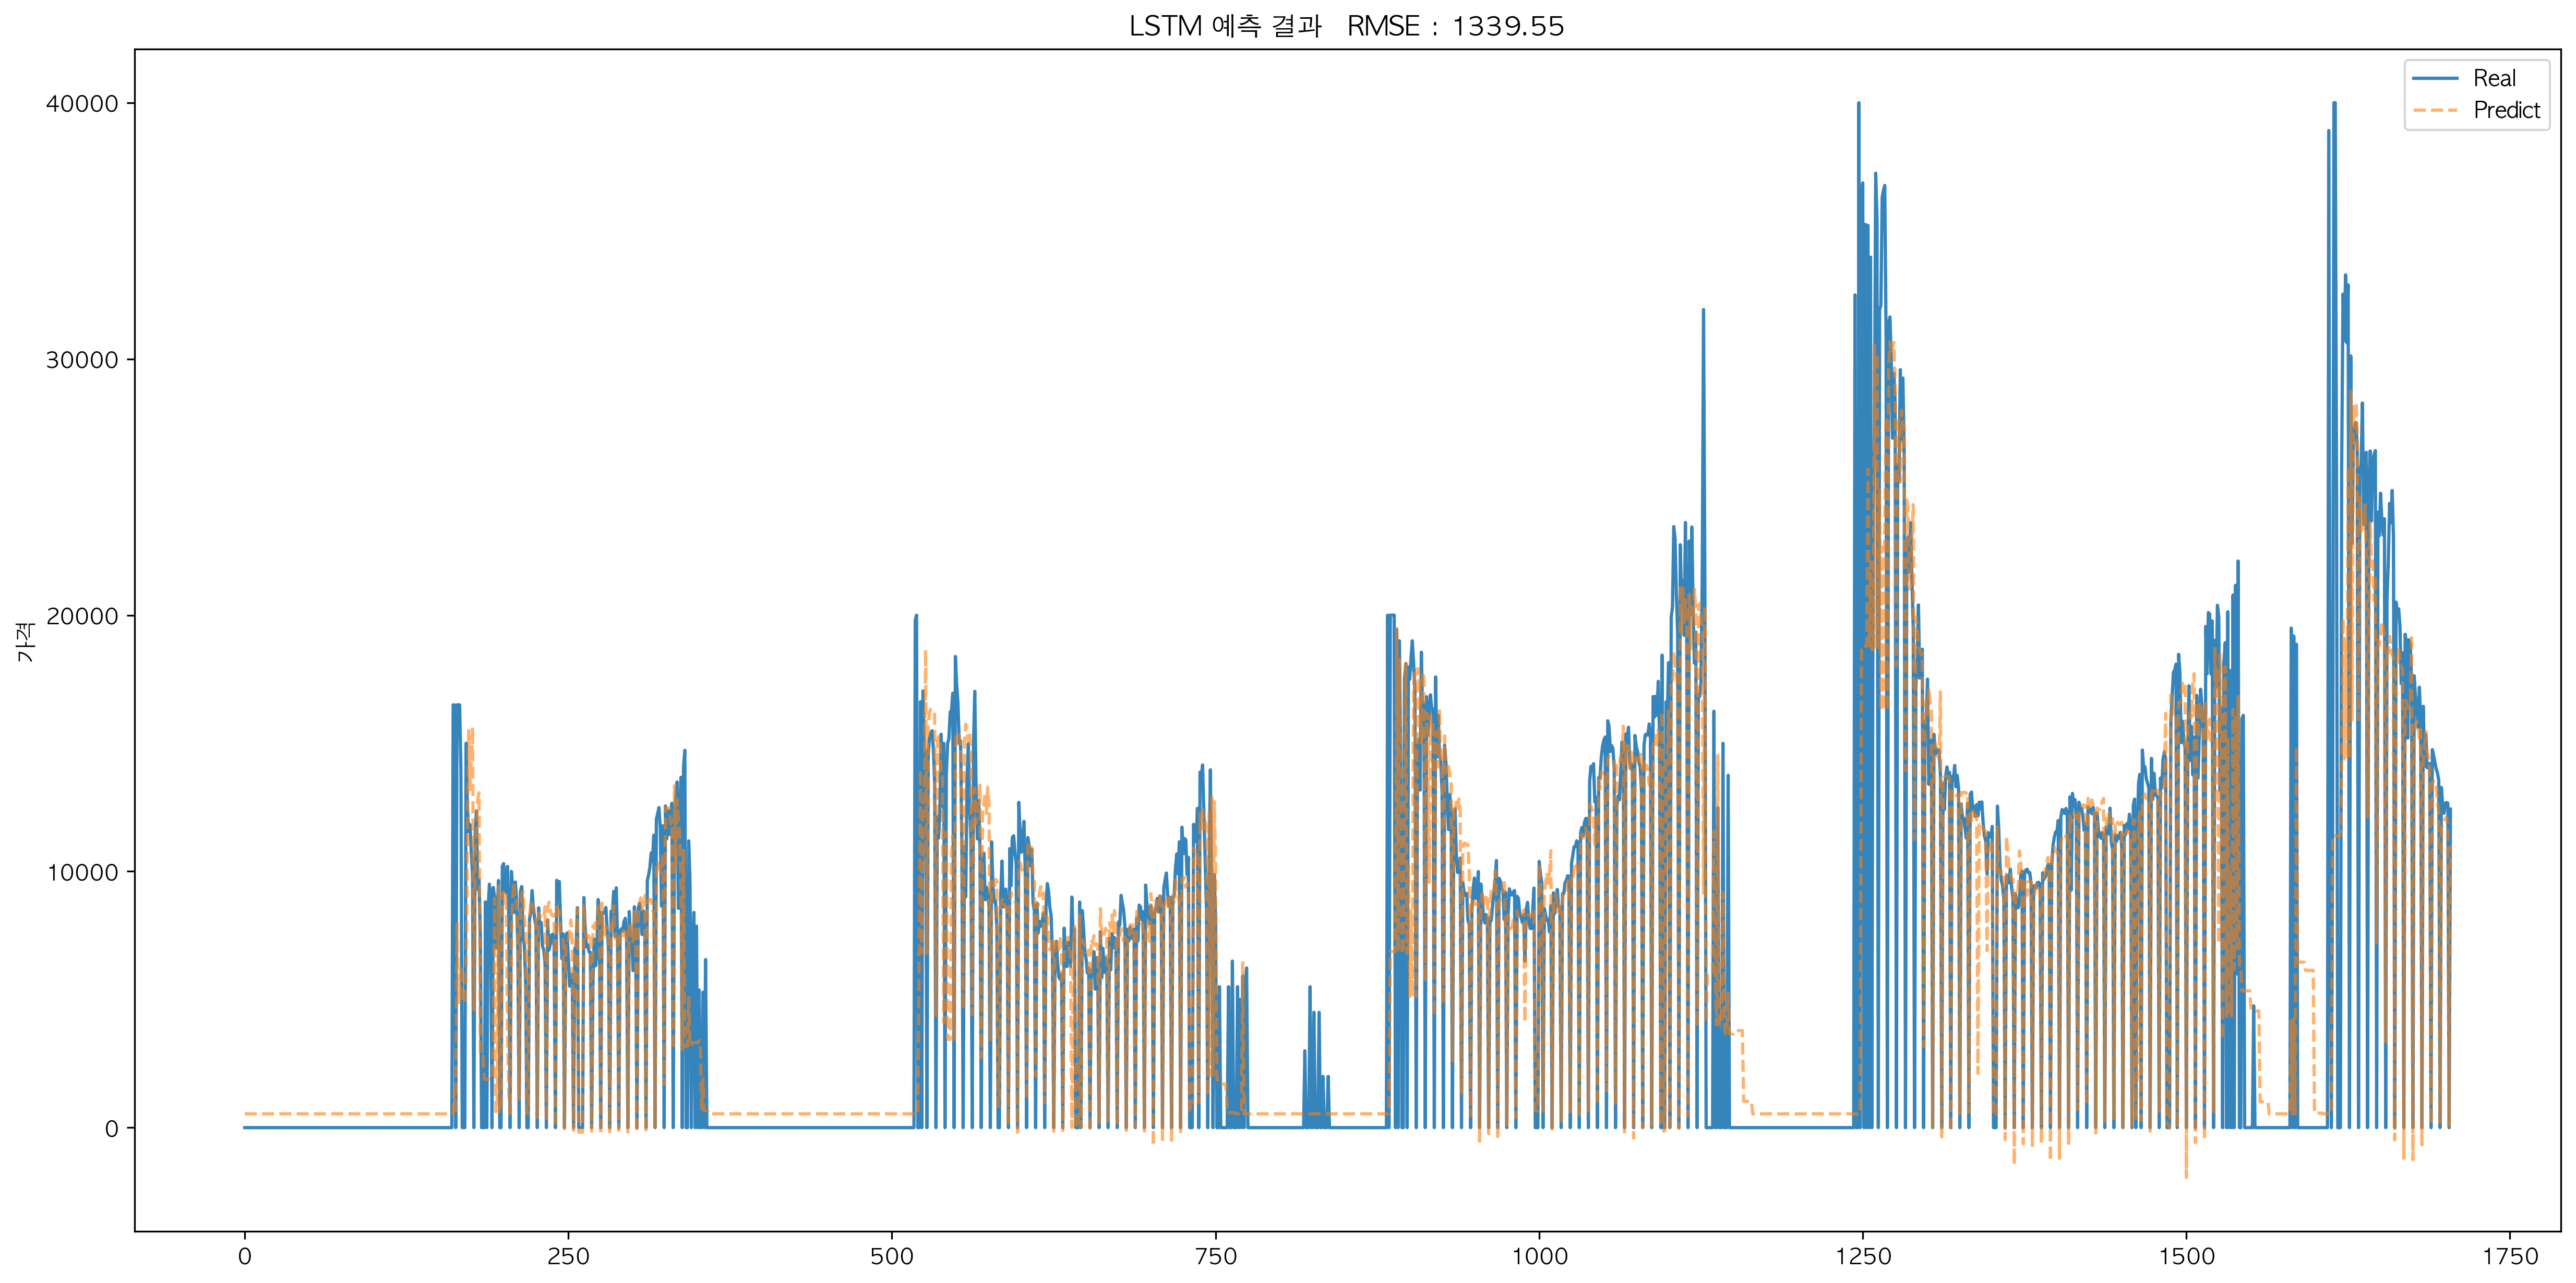

In [17]:
y_pred = model.predict(X_test)
RMSE = mean_squared_error(y_test.reshape(-1,1), y_pred.reshape(-1,1)) ** 0.5

plt.figure(figsize=(20, 10), dpi=300)
plt.title('LSTM 예측 결과'+   '   RMSE : ' + str(RMSE)[:7])
plt.ylabel('가격')
plt.plot(np.array(y_train.reshape(-1,1)), alpha = 0.9, label = 'Real')
plt.plot(model.predict(X_train).reshape(-1,1), alpha = 0.6, linestyle = "--", label = 'Predict')
plt.legend()
plt.show()